In [24]:
from pydeseq2.ds import DeseqStats, DefaultInference, DeseqDataSet
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
venancio = pd.read_parquet('../expresion/venancio_bias_corrected.parquet')
condicion = pd.read_parquet('condicion.parquet')

In [15]:
venancio, condicion = venancio.align(condicion, join='inner', axis=0)

# DeSeq2

In [16]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=venancio,
    metadata=condicion,
    design_factors="estres",  # compare samples based on the "condition"
    refit_cooks=True,
    inference=inference,
)

In [19]:
dds.deseq2()

Fitting size factors...
... done in 0.93 seconds.

Fitting dispersions...
... done in 26.47 seconds.

Fitting dispersion trend curve...
... done in 1.24 seconds.

Fitting MAP dispersions...
... done in 24.99 seconds.

Fitting LFCs...
... done in 25.41 seconds.

Calculating cook's distance...
... done in 5.83 seconds.

Replacing 4436 outlier genes.

Fitting dispersions...
... done in 2.21 seconds.

Fitting MAP dispersions...
... done in 2.14 seconds.

Fitting LFCs...
... done in 3.79 seconds.



In [22]:
soy_stat = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)
soy_stat.summary()

Running Wald tests...
... done in 3.88 seconds.



Log2 fold change & Wald test p-value: estres drought vs control
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
Glyma.01G000100  47.122299        0.868318  0.228511  3.799901  0.000145   
Glyma.01G000137   4.911446        1.078823  0.436053  2.474064  0.013359   
Glyma.01G000174  16.122059       -0.377114  0.294743 -1.279467  0.200733   
Glyma.01G000211  13.412127       -0.562483  0.347466 -1.618811  0.105488   
Glyma.01G000248  12.398668       -0.338326  0.300695 -1.125145  0.260528   
...                    ...             ...       ...       ...       ...   
Glyma.U045402     6.647993       -1.712393  0.511089 -3.350475  0.000807   
Glyma.U045502     0.753277        0.963896  0.940909  1.024431  0.305632   
Glyma.U045602     6.140348       -1.598178  0.677194 -2.360000  0.018275   
Glyma.U045702     1.918289       -0.504207  0.688878 -0.731925  0.464214   
Glyma.U045802     6.3868

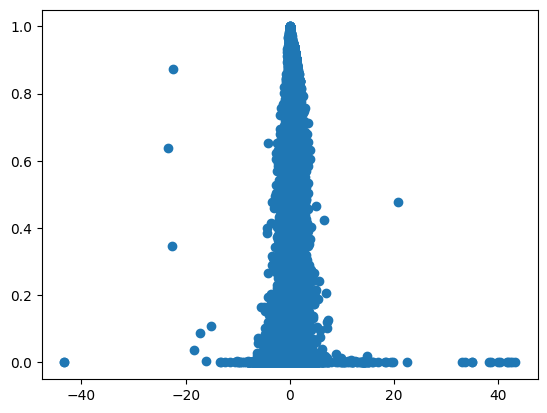

In [26]:
plt.scatter(soy_stat.results_df['log2FoldChange'], soy_stat.results_df['pvalue'])